In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as F1
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from datetime import datetime
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN, GRU
from keras.optimizers import SGD

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#SVM

In [ ]:
df = pd.read_csv('/content/drive/My Drive/SBU/DM/03/data/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
x = df.drop('price_range', axis=1)
y = df['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

## Kernels

###Tolerance = 1e-3 (default) ~ Kernel: Linear

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', gamma='auto'))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        94
           1       0.90      0.97      0.93       102
           2       0.96      0.88      0.92       120
           3       0.92      0.98      0.95        84

    accuracy                           0.94       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.94      0.94      0.94       400



###Tolerance = 1e-3 (default) ~ Kernel: RBF

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', gamma='auto'))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        94
           1       0.84      0.84      0.84       102
           2       0.84      0.84      0.84       120
           3       0.91      0.92      0.91        84

    accuracy                           0.88       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.88      0.88      0.88       400



###Tolerance = 1e-3 (default) ~ Kernel: Polynomial 

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='poly', gamma='auto'))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.66      0.74      0.70       102
           2       0.72      0.69      0.71       120
           3       0.83      0.81      0.82        84

    accuracy                           0.76       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.76      0.76       400



###Tolerance = 1e-3 (default) ~ Kernel: Sigmoid

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='sigmoid', gamma='scale'))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        94
           1       0.85      0.92      0.89       102
           2       0.95      0.86      0.90       120
           3       0.92      0.99      0.95        84

    accuracy                           0.92       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.92      0.92      0.92       400



###Tolerance = 1e-1 ~ Kernel: Linear

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        94
           1       0.91      0.98      0.94       102
           2       0.97      0.88      0.93       120
           3       0.92      0.98      0.95        84

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



###Tolerance = 1e-1 ~ Kernel: RBF

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        94
           1       0.83      0.84      0.83       102
           2       0.83      0.83      0.83       120
           3       0.90      0.90      0.90        84

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



###Tolerance = 1e-1 ~ Kernel: Polynomial

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='poly', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.66      0.74      0.70       102
           2       0.72      0.69      0.71       120
           3       0.83      0.81      0.82        84

    accuracy                           0.76       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.76      0.76       400



###Tolerance = 1e-1 ~ Kernel: Sigmoid

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='sigmoid', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        94
           1       0.85      0.91      0.88       102
           2       0.94      0.85      0.89       120
           3       0.91      0.99      0.95        84

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.91       400



## Margin

In [ ]:
c_values = [0.2, 0.4, 0.6, 0.8]

###Kernel: Linear

In [ ]:
for c in c_values:
    model = make_pipeline(StandardScaler(), SVC(C=c, kernel='linear', tol=1e-1))
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f'Regularization parameter = {c}\n\n',classification_report(y_test, preds), 
          '\n- - - - - - - - - - - - - - - - - - - - - - - - - - - ')

Regularization parameter = 0.2

               precision    recall  f1-score   support

           0       0.96      0.96      0.96        94
           1       0.90      0.94      0.92       102
           2       0.97      0.86      0.91       120
           3       0.89      0.99      0.94        84

    accuracy                           0.93       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.93      0.93       400
 
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Regularization parameter = 0.4

               precision    recall  f1-score   support

           0       0.96      0.96      0.96        94
           1       0.89      0.94      0.91       102
           2       0.96      0.87      0.91       120
           3       0.91      0.98      0.94        84

    accuracy                           0.93       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.93      0.93       400
 
- - - -

###Kernel: RBF

In [ ]:
for c in c_values:
    model = make_pipeline(StandardScaler(), SVC(C=c, kernel='rbf', tol=1e-1))
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f'Regularization parameter = {c}\n\n',classification_report(y_test, preds), 
          '\n- - - - - - - - - - - - - - - - - - - - - - - - - - - ')

Regularization parameter = 0.2

               precision    recall  f1-score   support

           0       0.95      0.86      0.91        94
           1       0.70      0.88      0.78       102
           2       0.83      0.72      0.77       120
           3       0.89      0.88      0.89        84

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.83      0.83       400
 
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Regularization parameter = 0.4

               precision    recall  f1-score   support

           0       0.95      0.88      0.92        94
           1       0.75      0.87      0.81       102
           2       0.81      0.79      0.80       120
           3       0.91      0.85      0.88        84

    accuracy                           0.84       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.85      0.84      0.85       400
 
- - - -

###Kernel: Polynomial

In [ ]:
for c in c_values:
    model = make_pipeline(StandardScaler(), SVC(C=c, kernel='poly', tol=1e-1))
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f'Regularization parameter = {c}\n\n',classification_report(y_test, preds), 
          '\n- - - - - - - - - - - - - - - - - - - - - - - - - - - ')

Regularization parameter = 0.2

               precision    recall  f1-score   support

           0       0.87      0.76      0.81        94
           1       0.49      0.85      0.62       102
           2       0.68      0.35      0.46       120
           3       0.85      0.80      0.82        84

    accuracy                           0.67       400
   macro avg       0.72      0.69      0.68       400
weighted avg       0.71      0.67      0.66       400
 
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Regularization parameter = 0.4

               precision    recall  f1-score   support

           0       0.90      0.78      0.83        94
           1       0.62      0.79      0.70       102
           2       0.73      0.71      0.72       120
           3       0.90      0.79      0.84        84

    accuracy                           0.76       400
   macro avg       0.79      0.77      0.77       400
weighted avg       0.78      0.76      0.77       400
 
- - - -

###Kernel: Sigmoid

In [ ]:
for c in c_values:
    model = make_pipeline(StandardScaler(), SVC(C=c, kernel='sigmoid', tol=1e-1))
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f'Regularization parameter = {c}\n\n',classification_report(y_test, preds), 
          '\n- - - - - - - - - - - - - - - - - - - - - - - - - - - ')

Regularization parameter = 0.2

               precision    recall  f1-score   support

           0       0.99      0.95      0.97        94
           1       0.84      0.95      0.89       102
           2       0.93      0.82      0.87       120
           3       0.91      0.96      0.94        84

    accuracy                           0.91       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.91      0.91       400
 
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Regularization parameter = 0.4

               precision    recall  f1-score   support

           0       0.95      0.94      0.94        94
           1       0.85      0.92      0.89       102
           2       0.96      0.85      0.90       120
           3       0.91      0.99      0.95        84

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400
 
- - - -

#Feature Engineering

###Binning

In [ ]:
cdf = df.copy(deep=True)
min_value = df['battery_power'].min()
max_value = df['battery_power'].max()
bins = np.linspace(min_value, max_value, 4)
labels = [1, 2, 3]

In [ ]:
cdf['bins'] = pd.cut(cdf['battery_power'], bins=bins, labels=labels, include_lowest=True)

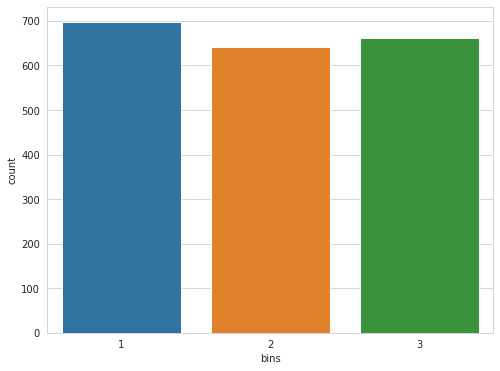

In [ ]:
plt.figure(figsize=(8,6),)
sns.set_style('whitegrid')
sns.countplot(cdf.bins)

In [ ]:
x = cdf.drop(['price_range','battery_power'], axis=1)
y = cdf['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        94
           1       0.87      0.93      0.90       102
           2       0.95      0.86      0.90       120
           3       0.93      0.98      0.95        84

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [ ]:
cdf = df.copy(deep=True)
min_value = df['battery_power'].min()
max_value = df['battery_power'].max()
print(min_value)
print(max_value)

501
1998


In [ ]:
# setting bins manually

bins = [500, 700, 1100, 1600, 2000]
labels = [1, 2, 3, 4]

In [ ]:
cdf['bins'] = pd.cut(cdf['battery_power'], bins=bins, labels=labels, include_lowest=True)

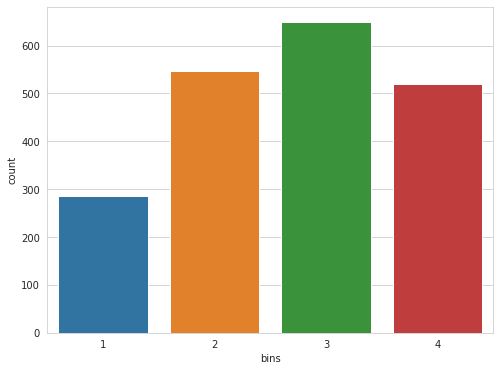

In [ ]:
plt.figure(figsize=(8,6),)
sns.set_style('whitegrid')
sns.countplot(cdf.bins)

In [ ]:
x = cdf.drop(['price_range','battery_power'], axis=1)
y = cdf['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        94
           1       0.88      0.92      0.90       102
           2       0.95      0.89      0.92       120
           3       0.93      0.96      0.95        84

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [ ]:
cdf = df.copy(deep=True)
min_value = df['battery_power'].min()
max_value = df['battery_power'].max()
bins = np.linspace(min_value, max_value, 6)
labels = [1, 2, 3, 4, 5]

In [ ]:
cdf['bins'] = pd.cut(cdf['battery_power'], bins=bins, labels=labels, include_lowest=True)

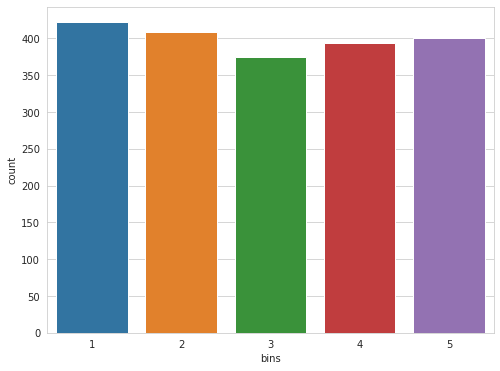

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(cdf.bins)

In [ ]:
x = cdf.drop(['price_range','battery_power'], axis=1)
y = cdf['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        94
           1       0.90      0.92      0.91       102
           2       0.95      0.88      0.91       120
           3       0.93      0.98      0.95        84

    accuracy                           0.93       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.93      0.93       400



### One Hot Encoding

In [ ]:
def OHE(cathlist, data):
    for item in cathlist:
        oh = pd.get_dummies(data[item], prefix=item, drop_first=True)
        data.drop(item, axis=1, inplace=True)
        data = data.join(oh)
    return data

In [ ]:
cathegorical = ['fc','m_dep','n_cores','pc']
ccdf = df.copy(deep=True)
ccdf = OHE(cathegorical, ccdf)

In [ ]:
ccdf

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,fc_1,fc_2,fc_3,fc_4,fc_5,fc_6,fc_7,fc_8,fc_9,fc_10,fc_11,fc_12,fc_13,fc_14,fc_15,fc_16,fc_17,fc_18,fc_19,m_dep_0.2,m_dep_0.3,m_dep_0.4,m_dep_0.5,m_dep_0.6,m_dep_0.7,m_dep_0.8,m_dep_0.9,m_dep_1.0,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20
0,842,0,2.2,0,0,7,188,20,756,2549,9,7,19,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1021,1,0.5,1,1,53,136,905,1988,2631,17,3,7,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,563,1,0.5,1,1,41,145,1263,1716,2603,11,2,9,1,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,615,1,2.5,0,0,10,131,1216,1786,2769,16,8,11,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1821,1,1.2,0,1,44,141,1208,1212,1411,8,2,15,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,1,2,106,1222,1890,668,13,4,19,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1996,1965,1,2.6,1,0,39,187,915,1965,2032,11,10,16,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,1911,0,0.9,1,1,36,108,868,1632,3057,9,1,5,1,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1998,1512,0,0.9,0,1,46,145,336,670,869,18,10,19,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = ccdf.drop(['price_range'], axis=1)
y = ccdf['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        94
           1       0.89      0.95      0.92       102
           2       0.94      0.85      0.89       120
           3       0.91      0.96      0.94        84

    accuracy                           0.93       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.93      0.93       400



### Transform

In [ ]:
cccdf = df.copy(deep=True)
cccdf.transform(lambda x: np.log(x))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,6.735780,-inf,0.788457,-inf,0.000000,-inf,1.945910,-0.510826,5.236442,0.693147,0.693147,2.995732,6.628041,7.843456,2.197225,1.945910,2.944439,-inf,-inf,0.0,0.000000
1,6.928538,0.0,-0.693147,0.0,-inf,0.0,3.970292,-0.356675,4.912655,1.098612,1.791759,6.807935,7.594884,7.875119,2.833213,1.098612,1.945910,0.0,0.0,-inf,0.693147
2,6.333280,0.0,-0.693147,0.0,0.693147,0.0,3.713572,-0.105361,4.976734,1.609438,1.791759,7.141245,7.447751,7.864420,2.397895,0.693147,2.197225,0.0,0.0,-inf,0.693147
3,6.421622,0.0,0.916291,-inf,-inf,-inf,2.302585,-0.223144,4.875197,1.791759,2.197225,7.103322,7.487734,7.926242,2.772589,2.079442,2.397895,0.0,-inf,-inf,0.693147
4,7.507141,0.0,0.182322,-inf,2.564949,0.0,3.784190,-0.510826,4.948760,0.693147,2.639057,7.096721,7.100027,7.252054,2.079442,0.693147,2.708050,0.0,0.0,-inf,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6.677083,0.0,-0.693147,0.0,-inf,0.0,0.693147,-0.223144,4.663439,1.791759,2.639057,7.108244,7.544332,6.504288,2.564949,1.386294,2.944439,0.0,0.0,-inf,-inf
1996,7.583248,0.0,0.955511,0.0,-inf,-inf,3.663562,-1.609438,5.231109,1.386294,1.098612,6.818924,7.583248,7.616776,2.397895,2.302585,2.772589,0.0,0.0,0.0,0.693147
1997,7.555382,-inf,-0.105361,0.0,0.000000,0.0,3.583519,-0.356675,4.682131,2.079442,1.098612,6.766192,7.397562,8.025189,2.197225,0.000000,1.609438,0.0,0.0,-inf,1.098612
1998,7.321189,-inf,-0.105361,-inf,1.386294,0.0,3.828641,-2.302585,4.976734,1.609438,1.609438,5.817111,6.507278,6.767343,2.890372,2.302585,2.944439,0.0,0.0,0.0,-inf


In [ ]:
x = cccdf.drop(['price_range'], axis=1)
y = cccdf['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        94
           1       0.91      0.98      0.94       102
           2       0.97      0.88      0.93       120
           3       0.92      0.98      0.95        84

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



### New Feature

In [ ]:
ccccdf = df.copy(deep=True)
ccccdf['area'] = ccccdf['px_height'] * ccccdf['px_width']
ccccdf

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,225120


In [ ]:
x = ccccdf.drop(['price_range'], axis=1)
y = ccccdf['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        94
           1       0.91      0.95      0.93       102
           2       0.96      0.88      0.92       120
           3       0.92      0.98      0.95        84

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



### All in One

In [ ]:
adf = df.copy(deep=True)
min_value = df['battery_power'].min()
max_value = df['battery_power'].max()
bins = np.linspace(min_value, max_value, 6)
labels = [1, 2, 3, 4, 5]
adf['bins'] = pd.cut(adf['battery_power'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
cathegorical = ['fc','m_dep','n_cores','pc','bins']
adf = OHE(cathegorical, adf)

In [ ]:
adf['area'] = adf['px_height'] * adf['px_width']

In [ ]:
adf.transform(lambda x: np.log(x))

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,fc_1,fc_2,fc_3,fc_4,fc_5,fc_6,fc_7,fc_8,fc_9,fc_10,fc_11,fc_12,fc_13,fc_14,fc_15,fc_16,fc_17,fc_18,fc_19,m_dep_0.2,m_dep_0.3,m_dep_0.4,m_dep_0.5,m_dep_0.6,m_dep_0.7,m_dep_0.8,m_dep_0.9,m_dep_1.0,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20,bins_2,bins_3,bins_4,bins_5,area
0,6.735780,-inf,0.788457,-inf,-inf,1.945910,5.236442,2.995732,6.628041,7.843456,2.197225,1.945910,2.944439,-inf,-inf,0.0,0.000000,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,9.623774
1,6.928538,0.0,-0.693147,0.0,0.0,3.970292,4.912655,6.807935,7.594884,7.875119,2.833213,1.098612,1.945910,0.0,0.0,-inf,0.693147,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,14.402819
2,6.333280,0.0,-0.693147,0.0,0.0,3.713572,4.976734,7.141245,7.447751,7.864420,2.397895,0.693147,2.197225,0.0,0.0,-inf,0.693147,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,14.588996
3,6.421622,0.0,0.916291,-inf,-inf,2.302585,4.875197,7.103322,7.487734,7.926242,2.772589,2.079442,2.397895,0.0,-inf,-inf,0.693147,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,14.591056
4,7.507141,0.0,0.182322,-inf,0.0,3.784190,4.948760,7.096721,7.100027,7.252054,2.079442,0.693147,2.708050,0.0,0.0,-inf,0.000000,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,14.196749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6.677083,0.0,-0.693147,0.0,0.0,0.693147,4.663439,7.108244,7.544332,6.504288,2.564949,1.386294,2.944439,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,14.652576
1996,7.583248,0.0,0.955511,0.0,-inf,3.663562,5.231109,6.818924,7.583248,7.616776,2.397895,2.302585,2.772589,0.0,0.0,0.0,0.693147,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,14.402172
1997,7.555382,-inf,-0.105361,0.0,0.0,3.583519,4.682131,6.766192,7.397562,8.025189,2.197225,0.000000,1.609438,0.0,0.0,-inf,1.0986

In [ ]:
x = adf.drop(['price_range'], axis=1)
y = adf['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

model = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', tol=1e-1))
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.88      0.93      0.90       102
           2       0.92      0.81      0.86       120
           3       0.87      0.95      0.91        84

    accuracy                           0.91       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.91      0.91      0.91       400



# Decision Tree

In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, random_state=101)

clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        94
           1       0.73      0.83      0.78       102
           2       0.86      0.74      0.79       120
           3       0.86      0.93      0.89        84

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.83      0.83       400



In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, random_state=101)

clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        94
           1       0.82      0.82      0.82       102
           2       0.85      0.83      0.84       120
           3       0.89      0.93      0.91        84

    accuracy                           0.87       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, random_state=101)

clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        94
           1       0.69      0.76      0.73       102
           2       0.75      0.66      0.70       120
           3       0.80      0.88      0.84        84

    accuracy                           0.78       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.78      0.78      0.78       400



In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2, random_state=101)

clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82        94
           1       0.63      0.79      0.70       102
           2       0.74      0.63      0.68       120
           3       0.78      0.83      0.80        84

    accuracy                           0.74       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.76      0.74      0.75       400



In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=500, random_state=101)

clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        94
           1       0.63      0.76      0.69       102
           2       0.74      0.63      0.68       120
           3       0.78      0.83      0.80        84

    accuracy                           0.74       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.74      0.74       400



In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, min_samples_split=300, random_state=101)

clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        94
           1       0.63      0.76      0.69       102
           2       0.74      0.63      0.68       120
           3       0.78      0.83      0.80        84

    accuracy                           0.74       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.74      0.74       400



In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4, min_samples_split=10, random_state=101)

clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.94      0.85        94
           1       0.73      0.54      0.62       102
           2       0.70      0.76      0.73       120
           3       0.82      0.81      0.81        84

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.75      0.76      0.75       400



### Pruning

In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, random_state=101)

clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [ ]:
preds = clf.predict(x_train)
print(classification_report(y_train, preds))

# Overfitted

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       398
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       416

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        94
           1       0.73      0.83      0.78       102
           2       0.86      0.74      0.79       120
           3       0.86      0.93      0.89        84

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.83      0.83       400



In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
               

In [ ]:
# Prevent Overfitting

preds = gcv.predict(x_train)
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       406
           1       0.87      0.93      0.90       398
           2       0.92      0.88      0.90       380
           3       0.96      0.96      0.96       416

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [ ]:
preds = gcv.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        94
           1       0.72      0.83      0.77       102
           2       0.85      0.75      0.80       120
           3       0.87      0.90      0.89        84

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



### Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(x_train, y_train)
preds = rfc.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        94
           1       0.82      0.87      0.85       102
           2       0.90      0.85      0.88       120
           3       0.93      0.94      0.93        84

    accuracy                           0.89       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.89      0.89      0.89       400



# Bitcoin Data

In [3]:
def accuracy(actual, predicted):
    truelbl = 0
    for i in range(len(actual)):
        if predicted.values[i] >= actual.values[i]*0.95 and predicted.values[i] <= actual.values[i]*1.05:
            truelbl += 1
    return truelbl / float(len(actual)) * 100.0

In [22]:
def accuracy_ar(actual, predicted):
    truelbl = 0
    for i in range(len(actual)):
        if predicted[i] >= actual.values[i]*0.95 and predicted[i] <= actual.values[i]*1.05:
            truelbl += 1
    return truelbl / float(len(actual)) * 100.0

## Preprocessing

In [4]:
bd = pd.read_csv('/content/drive/My Drive/SBU/DM/03/data/bitcoin.csv')
bd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 01, 2021","57,807.1","57,719.1","58,449.4","57,029.5",63.41K,0.15%
1,"Apr 30, 2021","57,720.3","53,562.3","57,925.6","53,088.7",103.74K,7.77%
2,"Apr 29, 2021","53,560.8","54,838.6","55,173.7","52,400.0",83.90K,-2.34%
3,"Apr 28, 2021","54,841.4","55,036.0","56,419.9","53,876.4",86.96K,-0.35%
4,"Apr 27, 2021","55,036.5","54,011.1","55,427.8","53,345.0",84.08K,1.88%


In [5]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3941 non-null   object
 1   Price     3941 non-null   object
 2   Open      3941 non-null   object
 3   High      3941 non-null   object
 4   Low       3941 non-null   object
 5   Vol.      3941 non-null   object
 6   Change %  3941 non-null   object
dtypes: object(7)
memory usage: 215.6+ KB


In [6]:
bd['Date'] = pd.to_datetime(bd['Date'])
bd['Price'] = bd['Price'].str.replace(',','').astype(float)
bd['Open'] = bd['Open'].str.replace(',','').astype(float)
bd['High'] = bd['High'].str.replace(',','').astype(float)
bd['Low'] = bd['Low'].str.replace(',','').astype(float)
bd['Change %'] = bd['Change %'].str.replace('%','').astype(float)

In [7]:
bd['Vol.'] = bd['Vol.'].str.replace('.','')

for i in range(len(bd['Vol.'])):
    if '-' not in bd['Vol.'][i]:        
        if 'K' in bd['Vol.'][i]:
            bd['Vol.'][i] = bd['Vol.'][i].replace('K','0')
        if 'M' in bd['Vol.'][i]:
            bd['Vol.'][i] = bd['Vol.'][i].replace('M','0000')

bd['Vol.'] = bd['Vol.'].replace('-', np.nan)
bd['Vol.'] = bd['Vol.'].astype(float)
bd['Vol.'] = bd['Vol.'].fillna(bd['Vol.'].mean())

In [8]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3941 non-null   datetime64[ns]
 1   Price     3941 non-null   float64       
 2   Open      3941 non-null   float64       
 3   High      3941 non-null   float64       
 4   Low       3941 non-null   float64       
 5   Vol.      3941 non-null   float64       
 6   Change %  3941 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 215.6 KB


In [ ]:
bd["month"] = bd.Date.dt.month
bd["week"] = bd.Date.dt.week
bd["day"] = bd.Date.dt.day
bd["day_of_week"] = bd.Date.dt.dayofweek
bd.head()

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,day_of_week
0,2021-05-01,57807.1,57719.1,58449.4,57029.5,63410.0,0.15,5,17,1,5
1,2021-04-30,57720.3,53562.3,57925.6,53088.7,103740.0,7.77,4,17,30,4
2,2021-04-29,53560.8,54838.6,55173.7,52400.0,83900.0,-2.34,4,17,29,3
3,2021-04-28,54841.4,55036.0,56419.9,53876.4,86960.0,-0.35,4,17,28,2
4,2021-04-27,55036.5,54011.1,55427.8,53345.0,84080.0,1.88,4,17,27,1


In [10]:
bd = bd.set_index('Date')
bd = bd.reindex(index=bd.index[::-1])

In [ ]:
bd

,Price,Open,High,Low,Vol.,Change %,month,week,day,day_of_week
Date,,,,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00,7,28,18,6
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00,7,29,19,0
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00,7,29,20,1
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00,7,29,21,2
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00,7,29,22,3
...,...,...,...,...,...,...,...,...,...,...
2021-04-27,55036.5,54011.1,55427.8,53345.0,84080.0,1.88,4,17,27,1
2021-04-28,54841.4,55036.0,56419.9,53876.4,86960.0,-0.35,4,17,28,2
2021-04-29,53560.8,54838.6,55173.7,52400.0,83900.0,-2.34,4,17,29,3


In [ ]:
bd_day = bd.resample('D').mean()
bd_month = bd.resample('M').mean()
bd_quarter = bd.resample('Q').mean()
bd_year = bd.resample('Y').mean()

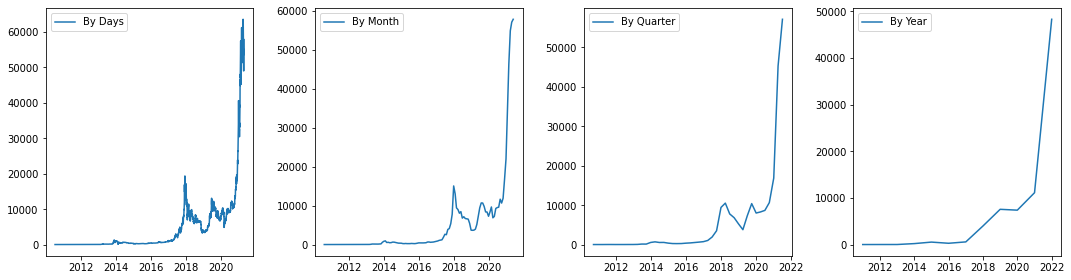

In [ ]:
fig = plt.figure(figsize=[15, 4])
plt.subplot(141)
plt.plot(bd_day.Price, '-', label='By Days')
plt.legend()

plt.subplot(142)
plt.plot(bd_month.Price, '-', label='By Month')
plt.legend()

plt.subplot(143)
plt.plot(bd_quarter.Price, '-', label='By Quarter')
plt.legend()

plt.subplot(144)
plt.plot(bd_year.Price, '-', label='By Year')
plt.legend()

plt.tight_layout()

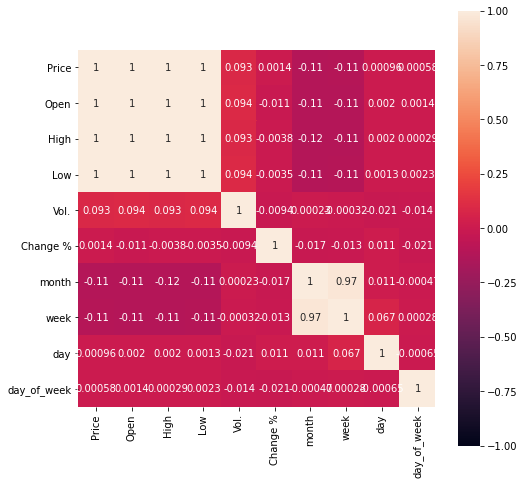

In [ ]:
plt.figure(figsize = (8,8))

sns.heatmap(bd.corr(), vmin = -1.0, annot = True, square = True)

In [ ]:
bd.shape

(3941, 10)

In [ ]:
bd.reset_index(drop=False, inplace=True)

lag_features = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
window1 = 3
window2 = 7
window3 = 30

bd_rolled_3d = bd[lag_features].rolling(window=window1, min_periods=0)
bd_rolled_7d = bd[lag_features].rolling(window=window2, min_periods=0)
bd_rolled_30d = bd[lag_features].rolling(window=window3, min_periods=0)

bd_mean_3d = bd_rolled_3d.mean().shift(1).reset_index()
bd_mean_7d = bd_rolled_7d.mean().shift(1).reset_index()
bd_mean_30d = bd_rolled_30d.mean().shift(1).reset_index()

bd_std_3d = bd_rolled_3d.std().shift(1).reset_index()
bd_std_7d = bd_rolled_7d.std().shift(1).reset_index()
bd_std_30d = bd_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    bd[f"{feature}_mean_lag{window1}"] = bd_mean_3d[feature]
    bd[f"{feature}_mean_lag{window2}"] = bd_mean_7d[feature]
    bd[f"{feature}_mean_lag{window3}"] = bd_mean_30d[feature]
    
    bd[f"{feature}_std_lag{window1}"] = bd_std_3d[feature]
    bd[f"{feature}_std_lag{window2}"] = bd_std_7d[feature]
    bd[f"{feature}_std_lag{window3}"] = bd_std_30d[feature]

bd.fillna(bd.mean(), inplace=True)

bd.set_index("Date", drop=True, inplace=True)
bd.head()

,Price,Open,High,Low,Vol.,Change %,month,week,day,day_of_week,Price_mean_lag3,Price_mean_lag7,Price_mean_lag30,Price_std_lag3,Price_std_lag7,Price_std_lag30,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Vol._mean_lag3,Vol._mean_lag7,Vol._mean_lag30,Vol._std_lag3,Vol._std_lag7,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,7,28,18,6,4384.001168,4356.39901,4192.667946,120.215113,188.17038,392.967314,4369.798651,4342.683194,4178.035475,119.821905,187.595325,392.095189,4502.276091,4474.157897,4305.834703,112.125061,182.580919,397.083009,4227.805804,4201.308785,4043.02206,119.610214,186.906225,379.61204,298360.542685,298314.310603,297989.782070,81150.105671,115971.765190,211516.744365,0.508538,0.507567,0.509008,3.613351,4.052868,4.670472
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,7,29,19,0,0.100000,0.10000,0.100000,120.215113,188.17038,392.967314,0.000000,0.000000,0.000000,119.821905,187.595325,392.095189,0.100000,0.100000,0.100000,112.125061,182.580919,397.083009,0.100000,0.100000,0.10000,119.610214,186.906225,379.61204,80.000000,80.000000,80.000000,81150.105671,115971.765190,211516.744365,0.000000,0.000000,0.000000,3.613351,4.052868,4.670472
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,7,29,20,1,0.100000,0.10000,0.100000,0.000000,0.00000,0.000000,0.050000,0.050000,0.050000,0.070711,0.070711,0.070711,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.100000,0.100000,0.10000,0.000000,0.000000,0.00000,325.000000,325.000000,325.000000,346.482323,346.482323,346.482323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,7,29,21,2,0.100000,0.10000,0.100000,0.000000,0.00000,0.000000,0.066667,0.066667,0.066667,0.057735,0.057735,0.057735,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.100000,0.100000,0.10000,0.000000,0.000000,0.00000,303.333333,303.333333,303.333333,247.857486,247.857486,247.857486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,7,29,22,3,0.100000,0.10000,0.100000,0.000000,0.00000,0.000000,0.100000,0.075000,0.075000,0.000000,0.050000,0.050000,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.100000,0.100000,0.10000,0.000000,0.000000,0.00000,470.000000,372.500000,372.500000,181.934054,245.136017,245.136017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
train = bd[:'2020-01-01']
test = bd['2020-01-01':]

In [ ]:
x_train = np.array(train.drop(['Price'], axis = 1))
y_train = np.array(train['Price'])
x_test = np.array(test.drop(['Price'], axis = 1))
y_test = np.array(test['Price'])
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (3455, 45)
y_train shape: (3455,)
x_test shape: (487, 45)
y_test shape: (487,)


In [ ]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

t = np.reshape(y_train, (-1,1))
y_train = StandardScaler().fit_transform(t)
y_train = y_train.reshape(-1)
t = np.reshape(y_test, (-1,1))
y_test = StandardScaler().fit_transform(t)
y_test = y_test.reshape(-1)

## Models

### Naive

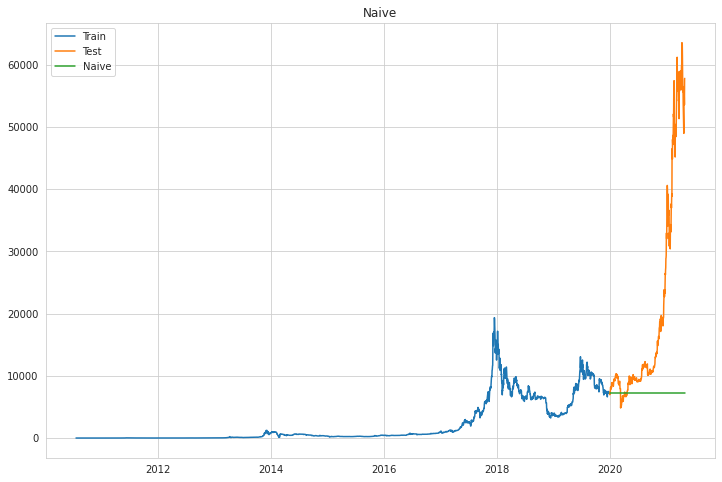

In [ ]:
price = np.asarray(train.Price)
y_hat = test.copy()
y_hat['naive'] = price[0]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index,test['Price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive')
plt.legend(loc='best')
plt.title("Naive")
plt.show()

In [ ]:
rms = sqrt(mse(test.Price, y_hat.naive))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  21659.137520985383


In [ ]:
accuracy(test.Price, y_hat.naive)

4.312114989733059

### Seasonal Naive

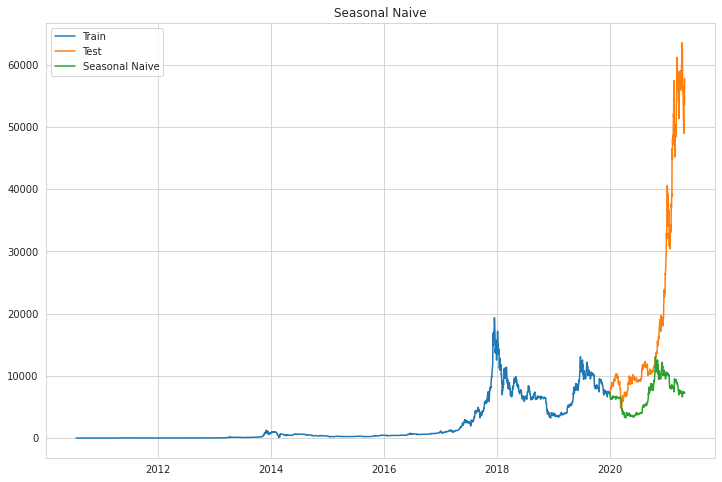

In [ ]:
price = np.asarray(train.Price)
y_hat = test.copy()
y_hat['naive'] = price[:len(test)]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index,test['Price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Seasonal Naive')
plt.legend(loc='best')
plt.title("Seasonal Naive")
plt.show()

In [ ]:
rms = sqrt(mse(test.Price, y_hat.naive))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  21140.994423818527


In [ ]:
accuracy(test.Price, y_hat.naive)

1.0266940451745379

###   TBATS

In [ ]:
!pip install tbats

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 1.5MB 7.7MB/s 
     |████████████████████████████████| 9.5MB 18.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from tbats import TBATS, BATS

estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(train.Price)

y_forecast = model.forecast(steps=len(test))

In [ ]:
test['Forecast_TBATS'] = y_forecast

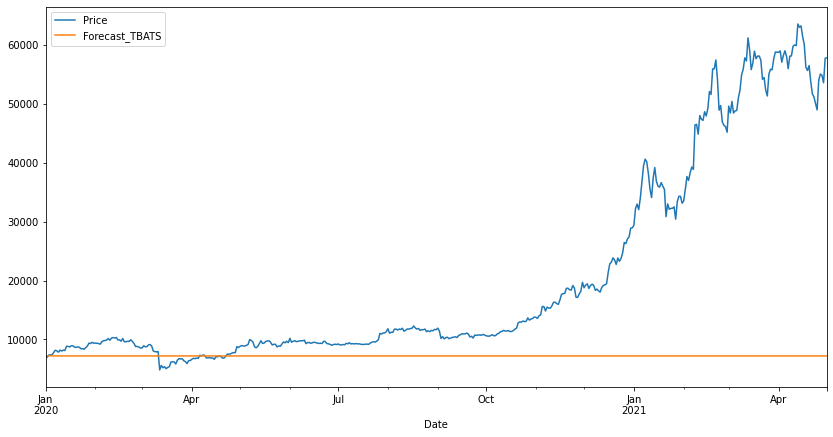

In [ ]:
test[['Price','Forecast_TBATS']].plot(figsize=(14,7))

In [ ]:
rms = sqrt(mse(test.Price, test.Forecast_TBATS))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  21660.0874178224


In [ ]:
accuracy(test.Price, test.Forecast_TBATS)

4.312114989733059

###ARIMAX


In [ ]:
import pmdarima as pm

In [ ]:
exof = ['Price_mean_lag3', 'Price_mean_lag7', 'Price_mean_lag30',
       'Price_std_lag3', 'Price_std_lag7', 'Price_std_lag30', 'Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Vol._mean_lag3', 'Vol._mean_lag7', 'Vol._mean_lag30',
       'Vol._std_lag3', 'Vol._std_lag7', 'Vol._std_lag30',
       'Change %_mean_lag3', 'Change %_mean_lag7', 'Change %_mean_lag30',
       'Change %_std_lag3', 'Change %_std_lag7', 'Change %_std_lag30', 'month',
       'week', 'day', 'day_of_week']

In [ ]:
model = pm.auto_arima(train.Price, exogenous=train[exof], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(train.Price, exogenous=train[exof])

forecast = model.predict(n_periods=len(test), exogenous=test[exof])
test["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=47674.984, Time=22.95 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47111.499, Time=22.88 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=47077.621, Time=12.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=47064.732, Time=24.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=71805.585, Time=9.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=47063.258, Time=19.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=47096.157, Time=37.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=47054.265, Time=18.54 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=47057.880, Time=21.61 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=47015.602, Time=39.65 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=47013.573, Time=21.85 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=47025.922, Time=26.07 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=47019.717, Time=50.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=47011.674, Time=9.19 sec
 ARIMA(

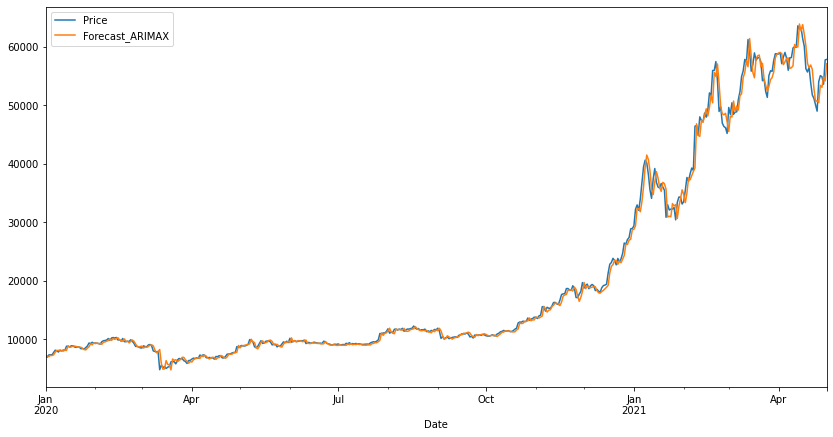

In [ ]:
test[["Price", "Forecast_ARIMAX"]].plot(figsize=(14, 7))


In [ ]:
rms = sqrt(mse(test.Price, test.Forecast_ARIMAX))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  1157.334095478213


In [ ]:
accuracy(test.Price, test.Forecast_ARIMAX)

82.54620123203286

### FB Prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
fbd = bd.reset_index()

In [ ]:
split_date = "2020-01-01"
train_filt = fbd['Date'] <= split_date
test_filt = fbd['Date'] > split_date

train_fb = fbd[train_filt]
test_fb = fbd[test_filt]

In [ ]:
model_fbp = Prophet()
for feature in exof:
    model_fbp.add_regressor(feature)

model_fbp.fit(train_fb[["Date", "Price"] + exof].rename(columns={"Date": "ds", "Price": "y"}))

forecast = model_fbp.predict(test_fb[["Date", "Price"] + exof].rename(columns={"Date": "ds"}))
forecast.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Change %_mean_lag3,Change %_mean_lag3_lower,Change %_mean_lag3_upper,Change %_mean_lag30,Change %_mean_lag30_lower,Change %_mean_lag30_upper,Change %_mean_lag7,Change %_mean_lag7_lower,Change %_mean_lag7_upper,Change %_std_lag3,Change %_std_lag3_lower,Change %_std_lag3_upper,Change %_std_lag30,Change %_std_lag30_lower,Change %_std_lag30_upper,Change %_std_lag7,Change %_std_lag7_lower,Change %_std_lag7_upper,High_mean_lag3,High_mean_lag3_lower,High_mean_lag3_upper,High_mean_lag30,High_mean_lag30_lower,High_mean_lag30_upper,High_mean_lag7,High_mean_lag7_lower,High_mean_lag7_upper,High_std_lag3,High_std_lag3_lower,High_std_lag3_upper,High_std_lag30,High_std_lag30_lower,High_std_lag30_upper,High_std_lag7,...,Vol._mean_lag7,Vol._mean_lag7_lower,Vol._mean_lag7_upper,Vol._std_lag3,Vol._std_lag3_lower,Vol._std_lag3_upper,Vol._std_lag30,Vol._std_lag30_lower,Vol._std_lag30_upper,Vol._std_lag7,Vol._std_lag7_lower,Vol._std_lag7_upper,additive_terms,additive_terms_lower,additive_terms_upper,day,day_lower,day_upper,day_of_week,day_of_week_lower,day_of_week_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,month,month_lower,month_upper,week,week_lower,week_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,2317.942312,6950.236144,7496.424224,2317.942312,2317.942312,2.613164,2.613164,2.613164,0.908552,0.908552,0.908552,-2.360381,-2.360381,-2.360381,-2.817453,-2.817453,-2.817453,-1.902371,-1.902371,-1.902371,5.701813,5.701813,5.701813,-699.233397,-699.233397,-699.233397,4755.410296,4755.410296,4755.410296,5406.254217,5406.254217,5406.254217,13.307793,13.307793,13.307793,19.061539,19.061539,19.061539,2.594566,...,1.151288,1.151288,1.151288,0.736092,0.736092,0.736092,0.178821,0.178821,0.178821,-1.056174,-1.056174,-1.056174,4903.301321,4903.301321,4903.301321,9.546789,9.546789,9.546789,0.000009,0.000009,0.000009,4926.217290,4926.217290,4926.217290,47.566383,47.566383,47.566383,19.275831,19.275831,19.275831,-3.124050,-3.124050,-3.124050,-19.791919,-19.791919,-19.791919,0.0,0.0,0.0,7221.243633
1,2020-01-03,2317.996338,6828.019596,7375.500037,2317.996338,2317.996338,3.474591,3.474591,3.474591,1.090289,1.090289,1.090289,-4.208998,-4.208998,-4.208998,-2.050473,-2.050473,-2.050473,-1.846089,-1.846089,-1.846089,4.676853,4.676853,4.676853,-689.597306,-689.597306,-689.597306,4749.919411,4749.919411,4749.919411,5375.565710,5375.565710,5375.565710,2.103402,2.103402,2.103402,17.698093,17.698093,17.698093,-3.940414,...,1.080285,1.080285,1.080285,0.911737,0.911737,0.911737,0.133186,0.133186,0.133186,-0.057910,-0.057910,-0.057910,4789.217824,4789.217824,4789.217824,8.853145,8.853145,8.853145,0.010524,0.010524,0.010524,4810.032543,4810.032543,4810.032543,47.566383,47.566383,47.566383,19.275831,19.275831,19.275831,5.811255,5.811255,5.811255,-26.625975,-26.625975,-26.625975,0.0,0.0,0.0,7107.214162
2,2020-01-04,2318.050363,7029.155747,7588.338469,2318.050363,2318.050363,-0.429718,-0.429718,-0.429718,0.708293,0.708293,0.708293,-1.350939,-1.350939,-1.350939,0.705305,0.705305,0.705305,-1.696386,-1.696386,-1.696386,2.556071,2.556071,2.556071,-692.876222,-692.876222,-692.876222,4740.779134,4740.779134,4740.779134,5391.921920,5391.921920,5391.921920,24.255275,24.255275,24.255275,22.474747,22.474747,22.474747,-3.689620,...,1.175746,1.175746,1.175746,3.599702,3.599702,3.599702,0.059801,0.059801,0.059801,-2.390948,-2.390948,-2.390948,4990.046621,4990.046621,4990.046621,8.159501,8.159501,8.159501,0.021039,0.021039,0.021039,5016.564331,5016.564331,5016.564331,47.566383,47.566383,47.566383,19.275831,19.275831,19.275831,6.818244,6.818244,6.818244,-33.335953,-33.335953,-33.335953,0.0,0.0,0.0,7308.096985
3,2020-01-05,2318.104389,6994.152531,7528.869526,2318.104389,2318.104389,-0.683808,-0.683808,-0.683808,0.837940,0.837940,0.837940,-1.569854,-1.569854,-1.569854,0.6783

In [ ]:
test_fb["Forecast_Prophet"] = forecast.yhat.values

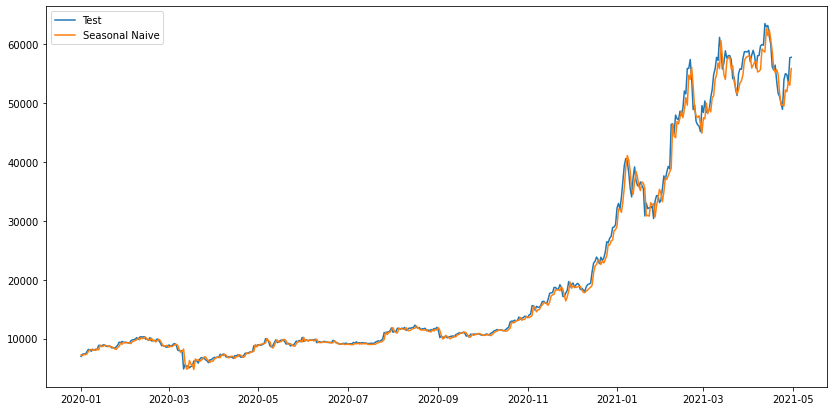

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(test[:-1].index,test_fb["Price"], label='Test')
plt.plot(test[:-1].index,test_fb["Forecast_Prophet"], label='Seasonal Naive')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mse(test_fb.Price, test_fb.Forecast_Prophet))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  1238.4478782789329


In [ ]:
accuracy(test_fb.Price, test_fb.Forecast_Prophet)

81.6872427983539

###XG Boost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
X_train, y_train = train[exof], train.Price
X_test, y_test = test[exof], test.Price

In [ ]:
reg = xgb.XGBRegressor()

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],  
 
}

In [ ]:
model  = RandomizedSearchCV(    
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [ ]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished


[23:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                  

In [ ]:
test['Forecast_XGBoost'] = model.predict(X_test)

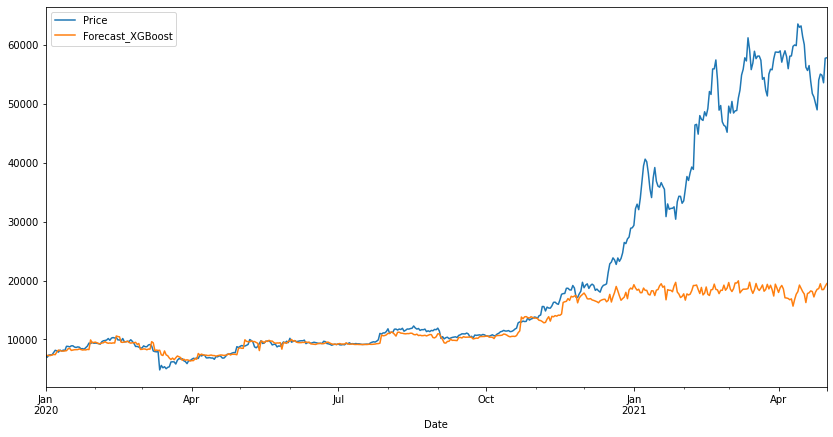

In [ ]:
test[['Price','Forecast_XGBoost']].plot(figsize=(14,7))

In [ ]:
rms = sqrt(mse(test.Price, test.Forecast_XGBoost))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  15808.673797217689


In [ ]:
accuracy(test.Price, test.Forecast_XGBoost)

40.4517453798768

### RNN

In [ ]:
rbd = pd.DataFrame(data=bd.Price, index=bd.index)

In [ ]:
rbd

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2021-04-27,55036.5
2021-04-28,54841.4
2021-04-29,53560.8


In [ ]:
training_set = rbd[:'2020-01-01']
test_set = rbd['2020-01-01':]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

training_set_scaled.shape

(3455, 1)

In [ ]:
X_train = []
y_train = []
for i in range(20,3454):
    X_train.append(training_set_scaled[i-20:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
inputs = rbd[len(rbd)-len(test_set) - 20:].values
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs  = sc.transform(inputs)

(507, 1)


In [ ]:
X_test = []
for i in range(20,507):
    X_test.append(inputs[i-20:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(3434, 20, 1)

In [ ]:
regressor = Sequential()
regressor.add(SimpleRNN(units=10))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
108/108 [==============================] - 2s 4ms/step - loss: 0.0954
Epoch 2/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 3/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 4/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 5/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 6/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 7/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 8/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 9/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 10/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 11/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 12/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 13/100


In [ ]:
pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

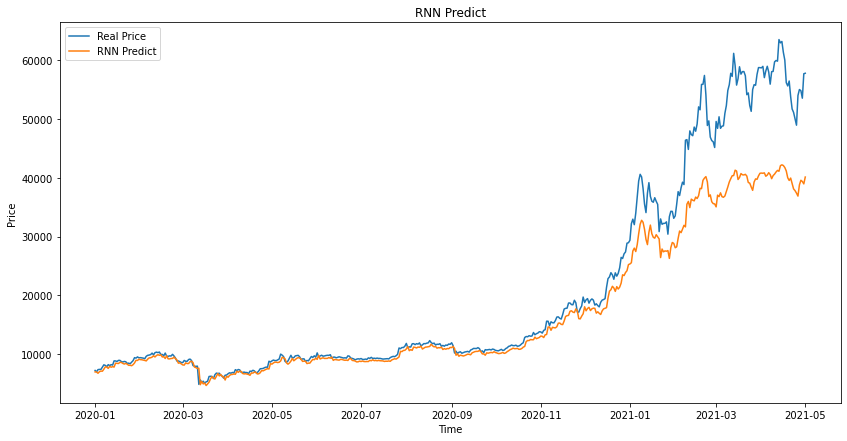

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(test_set.index, test_set,label='Real Price')
plt.plot(test_set.index, pred,label='RNN Predict')
plt.title('RNN Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mse(test_set, pred))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  6761.787756290435


In [ ]:
accuracy_ar(test_set, pred)

35.93429158110883

### GRU

In [ ]:
regressor = Sequential()
regressor.add(GRU(units=10))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
108/108 [==============================] - 4s 10ms/step - loss: 0.0320
Epoch 2/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 3/100
108/108 [==============================] - 1s 10ms/step - loss: 0.0021
Epoch 4/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 5/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 6/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 7/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 8/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 9/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 10/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 11/100
108/108 [==============================] - 1s 9ms/step - loss: 9.6087e-04
Epoch 12/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0010
Epoch 1

In [ ]:
pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

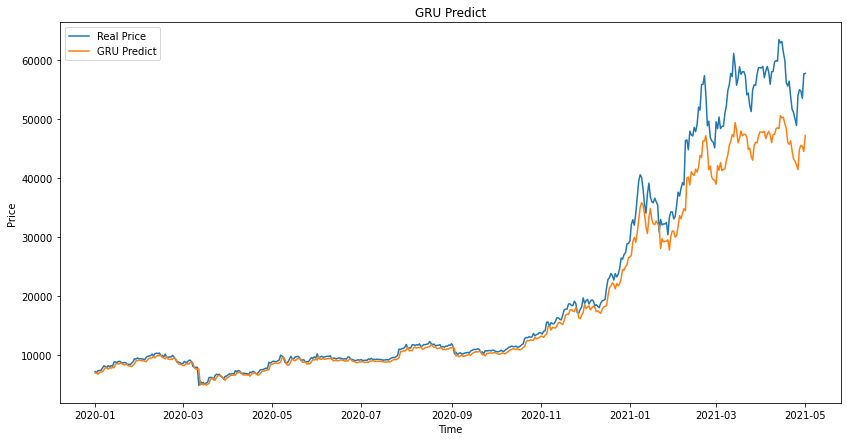

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(test_set.index, test_set,label='Real Price')
plt.plot(test_set.index, pred,label='GRU Predict')
plt.title('GRU Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mse(test_set, pred))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  4224.1363067620205


In [ ]:
accuracy_ar(test_set, pred)

47.63860369609856

### LSTM

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
108/108 [==============================] - 21s 20ms/step - loss: 0.0106
Epoch 2/100
108/108 [==============================] - 2s 20ms/step - loss: 7.9942e-04
Epoch 3/100
108/108 [==============================] - 2s 20ms/step - loss: 0.0011
Epoch 4/100
108/108 [==============================] - 2s 20ms/step - loss: 8.7576e-04
Epoch 5/100
108/108 [==============================] - 2s 20ms/step - loss: 7.4249e-04
Epoch 6/100
108/108 [==============================] - 2s 20ms/step - loss: 7.2962e-04
Epoch 7/100
108/108 [==============================] - 2s 20ms/step - loss: 5.8222e-04
Epoch 8/100
108/108 [==============================] - 2s 20ms/step - loss: 6.2838e-04
Epoch 9/100
108/108 [==============================] - 2s 20ms/step - loss: 5.5659e-04
Epoch 10/100
108/108 [==============================] - 2s 20ms/step - loss: 5.5534e-04
Epoch 11/100
108/108 [==============================] - 2s 20ms/step - loss: 5.6242e-04
Epoch 12/100
108/108 [==========================

In [ ]:
pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

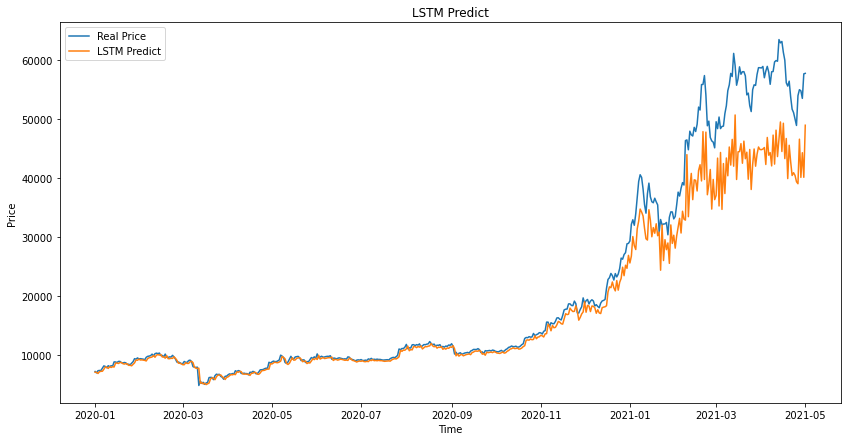

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(test_set.index, test_set,label='Real Price')
plt.plot(test_set.index, pred,label='LSTM Predict')
plt.title('LSTM Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mse(test_set, pred))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  5351.527154454537


In [ ]:
accuracy_ar(test_set, pred)

57.49486652977412

##AdaBoost

In [11]:
train = bd[:'2020-01-01']
test = bd['2020-01-01':]

In [12]:
x_train = np.array(train.drop(['Price'], axis = 1))
y_train = np.array(train['Price'])
x_test = np.array(test.drop(['Price'], axis = 1))
y_test = np.array(test['Price'])
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (3455, 5)
y_train shape: (3455,)
x_test shape: (487, 5)
y_test shape: (487,)


In [ ]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

t = np.reshape(y_train, (-1,1))
y_train = StandardScaler().fit_transform(t)
y_train = y_train.reshape(-1)
t = np.reshape(y_test, (-1,1))
y_test = StandardScaler().fit_transform(t)
y_test = y_test.reshape(-1)

In [13]:
from sklearn.ensemble import AdaBoostRegressor

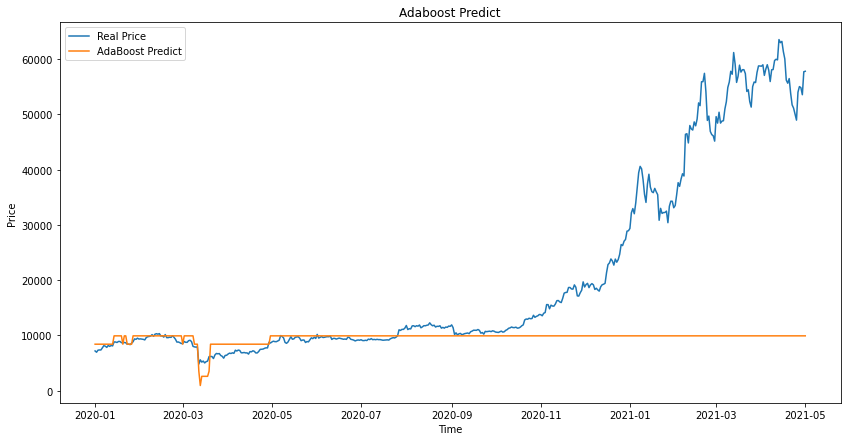

In [15]:
DTR = DecisionTreeRegressor(max_depth=1)
model_ada = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
model_ada.fit(x_train,y_train)
preds = model_ada.predict(x_test)
plt.figure(figsize=(14,7))
plt.plot(test.index, test.Price,label='Real Price')
plt.plot(test.index, preds, label='AdaBoost Predict')
plt.title('Adaboost Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [20]:
rms = sqrt(mse(test.Price, preds))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  15374.559452231357


In [23]:
accuracy_ar(test.Price, preds)

68.58316221765914

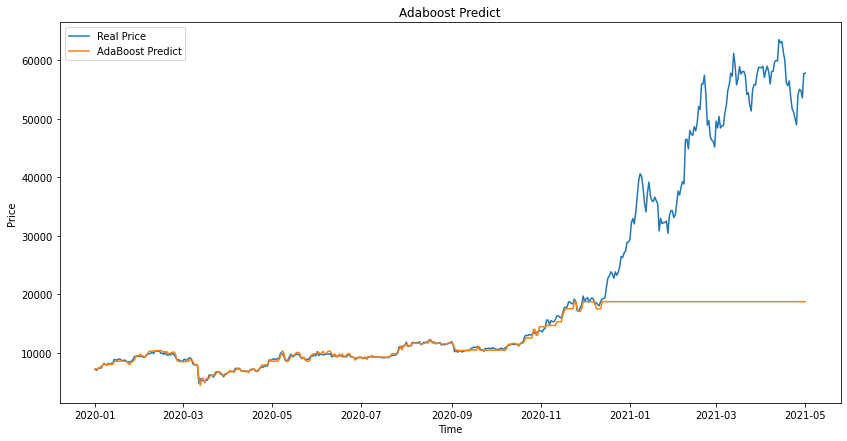

In [24]:
DTR = DecisionTreeRegressor(max_depth=3)
model_ada = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
model_ada.fit(x_train,y_train)
preds = model_ada.predict(x_test)
plt.figure(figsize=(14,7))
plt.plot(test.index, test.Price,label='Real Price')
plt.plot(test.index, preds, label='AdaBoost Predict')
plt.title('Adaboost Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [25]:
rms = sqrt(mse(test.Price, preds))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  15578.079847057697


In [26]:
accuracy_ar(test.Price, preds)

64.8870636550308

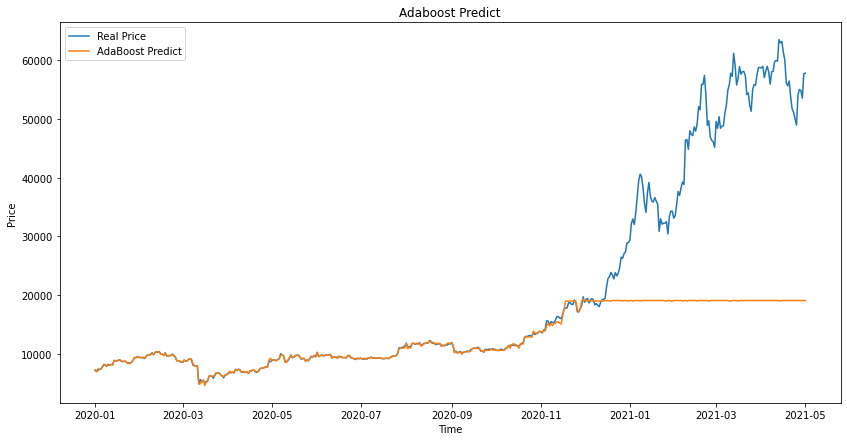

In [27]:
DTR = DecisionTreeRegressor(max_depth=10)
model_ada = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=1)
model_ada.fit(x_train,y_train)
preds = model_ada.predict(x_test)
plt.figure(figsize=(14,7))
plt.plot(test.index, test.Price,label='Real Price')
plt.plot(test.index, preds, label='AdaBoost Predict')
plt.title('Adaboost Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [28]:
rms = sqrt(mse(test.Price, preds))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  15420.652854226108


In [29]:
accuracy_ar(test.Price, preds)

69.40451745379876

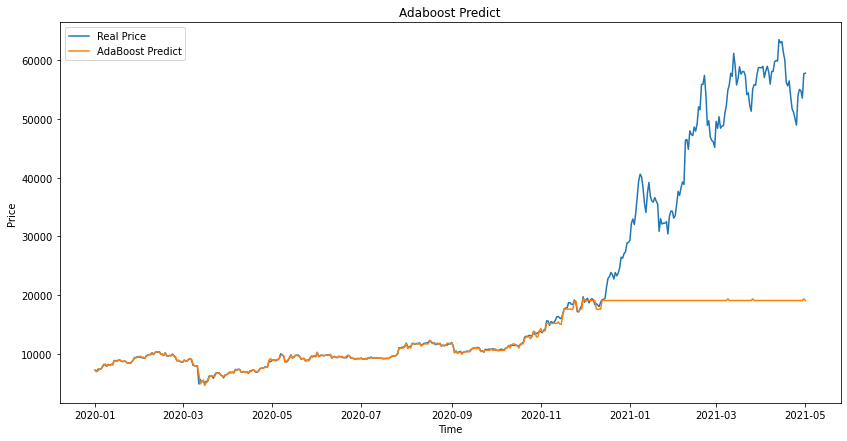

In [30]:
DTR = DecisionTreeRegressor(max_depth=10)
model_ada = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.5)
model_ada.fit(x_train,y_train)
preds = model_ada.predict(x_test)
plt.figure(figsize=(14,7))
plt.plot(test.index, test.Price,label='Real Price')
plt.plot(test.index, preds, label='AdaBoost Predict')
plt.title('Adaboost Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [31]:
rms = sqrt(mse(test.Price, preds))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  15412.182935333327


In [32]:
accuracy_ar(test.Price, preds)

68.99383983572895

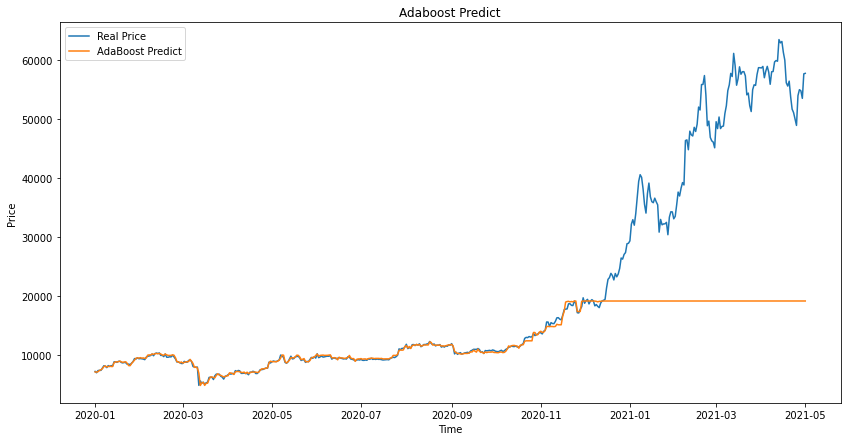

In [33]:
DTR = DecisionTreeRegressor(max_depth=5)
model_ada = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.2)
model_ada.fit(x_train,y_train)
preds = model_ada.predict(x_test)
plt.figure(figsize=(14,7))
plt.plot(test.index, test.Price,label='Real Price')
plt.plot(test.index, preds, label='AdaBoost Predict')
plt.title('Adaboost Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [34]:
rms = sqrt(mse(test.Price, preds))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  15374.92410070695


In [35]:
accuracy_ar(test.Price, preds)

68.17248459958932

## Random Forest Regression

In [37]:
rfr = RandomForestRegressor(n_estimators=500, criterion='mse')

In [38]:
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
pred = rfr.predict(x_test)

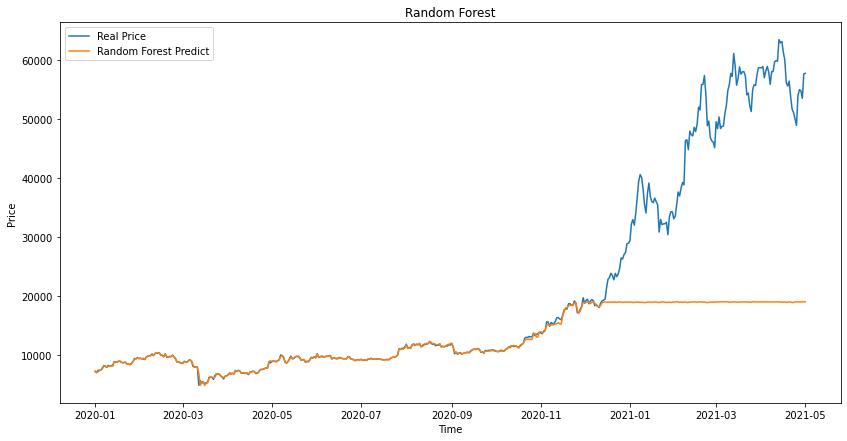

In [40]:
plt.figure(figsize=(14,7))
plt.plot(test.index, test.Price,label='Real Price')
plt.plot(test.index, pred, label='Random Forest Predict')
plt.title('Random Forest')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [43]:
rms = sqrt(mse(test.Price, pred))
print('Root Mean Squared Error: ',rms)

Root Mean Squared Error:  15467.00792963361


In [44]:
accuracy_ar(test.Price, pred)

70.84188911704312